In [1]:
# by sh
#'Example of classification'

# data from https://www.kaggle.com/annavictoria/speed-dating-experiment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input\sample_submission.csv
../input\Speed Dating Data Key.doc
../input\Speed Dating Data.csv
../input\Speed_Dating_Data.csv
../input\test.csv
../input\train.csv


In [2]:
# Loading and reviewing data
# data from https://www.kaggle.com/annavictoria/speed-dating-experiment

df = pd.read_csv("../input/Speed_Dating_Data.csv", engine='python')
df.shape

(8378, 195)

In [3]:
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8377,552,NaN,1,44,2,21,22,2,10.0,15,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [5]:
# Check for null values
df.isnull().values.any()

True

In [6]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


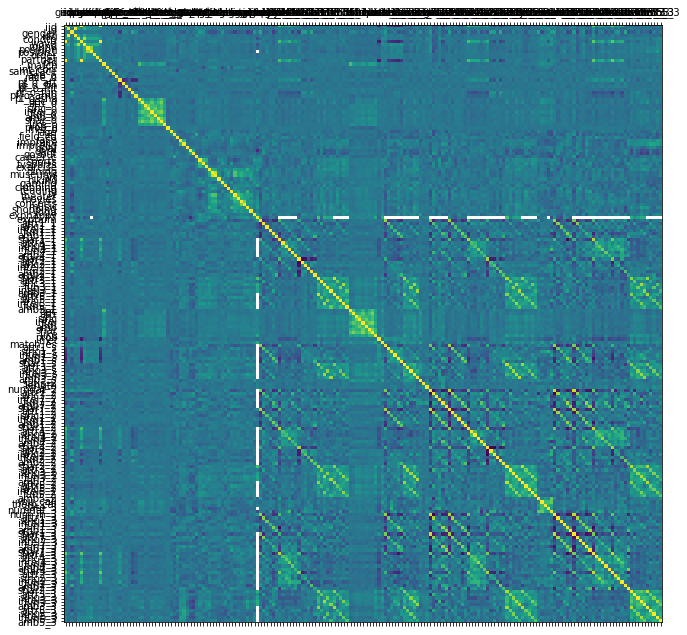

In [7]:
plot_corr(df)

In [8]:
df.corr()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,1.000000,0.117109,0.051937,0.120362,0.220413,0.996713,0.231881,0.081287,0.070443,0.090696,...,-0.003738,-0.005157,-0.117348,0.039944,-0.020409,0.092325,-0.053698,0.006949,0.100164,0.055229
id,0.117109,1.000000,-0.011623,0.998029,0.318768,0.091571,0.374462,0.168382,0.174008,0.149216,...,0.024213,-0.041815,-0.051621,-0.029917,0.010202,-0.018183,-0.007993,-0.088398,-0.046558,-0.119108
gender,0.051937,-0.011623,1.000000,0.033645,-0.002627,-0.001264,0.020630,-0.001091,0.005853,0.006685,...,-0.125433,-0.159709,0.023925,-0.144642,-0.058300,-0.103692,-0.289694,0.076538,-0.067432,0.055267
idg,0.120362,0.998029,0.033645,1.000000,0.324838,0.092645,0.387715,0.171495,0.177639,0.154691,...,0.020597,-0.051671,-0.051081,-0.036368,0.007404,-0.020785,-0.022967,-0.086071,-0.050316,-0.118940
condtn,0.220413,0.318768,-0.002627,0.324838,1.000000,0.219627,0.816316,0.329120,0.308641,0.324108,...,0.082965,0.034376,0.067836,0.066229,0.023614,0.068552,-0.063407,0.068622,0.114254,0.145598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr5_3,0.092325,-0.018183,-0.103692,-0.020785,0.068552,0.092906,0.025047,0.073360,0.201356,0.009776,...,0.851922,0.177047,0.444624,0.400945,0.222258,1.000000,0.197948,0.378176,0.406725,0.205368
sinc5_3,-0.053698,-0.007993,-0.289694,-0.022967,-0.063407,-0.028111,-0.027437,0.099616,0.102406,-0.010260,...,0.222731,0.614853,0.313755,0.184837,0.130029,0.197948,1.000000,0.505440,0.331171,0.268553
intel5_3,0.006949,-0.088398,0.076538,-0.086071,0.068622,0.000644,0.000923,0.093856,0.112979,-0.000037,...,0.351189,0.275642,0.681735,0.251750,0.263402,0.378176,0.505440,1.000000,0.270181,0.424972
fun5_3,0.100164,-0.046558,-0.067432,-0.050316,0.114254,0.103025,0.105866,0.148984,0.236393,0.043915,...,0.388431,0.172901,0.292684,0.775198,0.336507,0.406725,0.331171,0.270181,1.000000,0.398011


In [9]:
# Extract column names
df2 = df.loc[:,['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'dec_o']]

In [10]:
# Check for null values
df2.isnull().values.any()

True

In [11]:
df2.isnull().sum()

attr_o      212
sinc_o      287
intel_o     306
fun_o       360
amb_o       722
shar_o     1076
dec_o         0
dtype: int64

In [12]:
df2.isnull().sum().sum()

2963

In [13]:
df2.dropna(inplace=True)

df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 8377
Data columns (total 7 columns):
attr_o     7031 non-null float64
sinc_o     7031 non-null float64
intel_o    7031 non-null float64
fun_o      7031 non-null float64
amb_o      7031 non-null float64
shar_o     7031 non-null float64
dec_o      7031 non-null int64
dtypes: float64(6), int64(1)
memory usage: 439.4 KB


(7031, 7)

In [14]:
df2.tail(50)

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,dec_o
8320,6.0,4.0,5.0,4.0,5.0,3.0,0
8321,5.0,8.0,8.0,9.0,8.0,2.0,1
8322,6.0,8.0,8.0,6.0,8.0,5.0,0
8323,6.0,7.0,6.0,6.0,6.0,5.0,0
8324,8.0,8.0,9.0,9.0,9.0,7.0,1
8325,7.0,8.0,7.0,5.0,7.0,4.0,0
8326,2.0,2.0,9.0,2.0,7.0,1.0,0
8327,6.0,7.0,8.0,7.0,8.0,5.0,1
8328,6.0,7.0,6.0,4.0,7.0,6.0,0
8329,5.0,5.0,5.0,3.0,7.0,2.0,0


In [15]:
df2.head(50)

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,dec_o
0,6.0,8.0,8.0,8.0,8.0,6.0,0
1,7.0,8.0,10.0,7.0,7.0,5.0,0
2,10.0,10.0,10.0,10.0,10.0,10.0,1
3,7.0,8.0,9.0,8.0,9.0,8.0,1
4,8.0,7.0,9.0,6.0,9.0,7.0,1
5,7.0,7.0,8.0,8.0,7.0,7.0,1
6,3.0,6.0,7.0,5.0,8.0,7.0,0
7,6.0,7.0,5.0,6.0,8.0,6.0,0
8,7.0,7.0,8.0,8.0,8.0,9.0,1
9,6.0,6.0,6.0,6.0,6.0,6.0,0


In [16]:
def plot_corr(df2, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df2.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

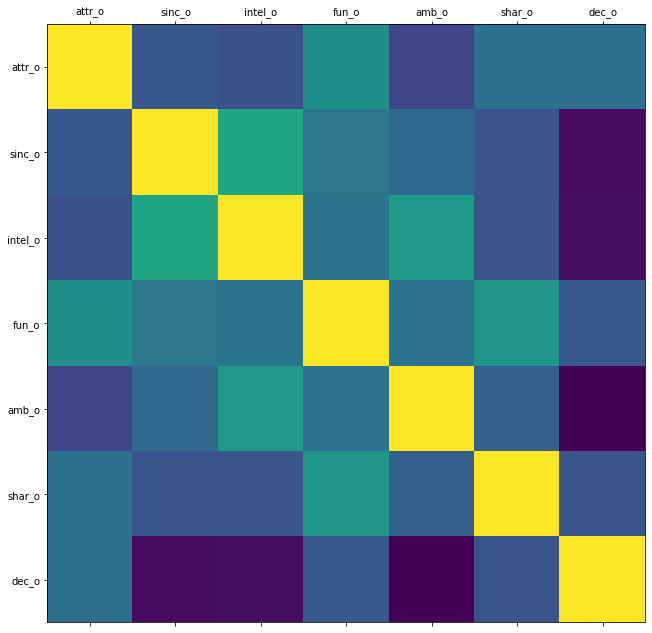

In [17]:
plot_corr(df2)

In [18]:
#Check class distribution
num_obs = len(df2)
num_true = len(df2.loc[df2['dec_o'] == 1])
num_false = len(df2.loc[df2['dec_o'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  3034 (43.15%)
Number of False cases: 3997 (56.85%)


In [19]:
#Spliting the data
#70% for training, 30% for testing

from sklearn.model_selection import train_test_split

feature_col_names = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']
predicted_class_names = ['dec_o']

X = df2[feature_col_names].values     # predictor feature columns (6 X m)
y = df2[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30
#split_test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [20]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df2.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df2.index)) * 100))

69.99% in training set
30.01% in test set


In [21]:
#Verifying predicted value was split correctly
print("Original True  : {0} ({1:0.2f}%)".format(len(df2.loc[df2['dec_o'] == 1]), (len(df2.loc[df2['dec_o'] == 1])/len(df2.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df2.loc[df2['dec_o'] == 0]), (len(df2.loc[df2['dec_o'] == 0])/len(df2.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 3034 (43.15%)
Original False : 3997 (56.85%)

Training True  : 2103 (42.74%)
Training False : 2818 (57.26%)

Test True      : 931 (44.12%)
Test False     : 1179 (55.88%)


In [22]:
#Post-split Data Preparation
#Hidden Missing Values

#Impute with the mean

from sklearn.impute import SimpleImputer

#Impute with mean all null readings
#fill_0 = SimpleImputer(missing_values=np.nan, strategy="mean") #, axis=0)

#X_train = fill_0.fit_transform(X_train)
#X_test = fill_0.fit_transform(X_test)

In [23]:
#Training Initial Algorithm - Naive Bayes
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
#Performance on Training Data
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7190



In [25]:
#Performance on Testing Data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))


Accuracy: 0.7090


In [26]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[798 381]
 [233 698]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1179
           1       0.65      0.75      0.69       931

    accuracy                           0.71      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.72      0.71      0.71      2110



In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
#Predict Training Data
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9216


In [29]:
#Predict Test Data
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7005


In [30]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[920 259]
 [373 558]]

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1179
           1       0.68      0.60      0.64       931

    accuracy                           0.70      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.70      0.70      0.70      2110



In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, solver='liblinear', random_state=42)
#lr_model = LogisticRegression(penalty='l2', solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7379
[[942 237]
 [316 615]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1179
           1       0.72      0.66      0.69       931

    accuracy                           0.74      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.74      0.74      0.74      2110



In [32]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train.ravel())
svc_predict_test = svc_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svc_predict_test)))
print(metrics.confusion_matrix(y_test, svc_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, svc_predict_test))

Accuracy: 0.7379
[[948 231]
 [322 609]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1179
           1       0.72      0.65      0.69       931

    accuracy                           0.74      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.74      0.74      0.74      2110

